In [1]:
from graph_class import *
from nltk_class import *
from text_mining import *

In [2]:
with open('twitter_.json', 'r') as file:
    raw_tweet = pd.DataFrame(json.load(file))
print(f'Whole Tweet: {len(raw_tweet)}')

Whole Tweet: 39273


In [3]:
nlp = NltkTextProcessing()
tweet_no_hash = nlp.remove_hashtag_from_text(raw_tweet)
tweet_df = nlp.process_df_text_column(tweet_no_hash, stem=False) # steem
tweet_df = nlp.process_df_hash_column(tweet_df)
unique_tweet_df = nlp.keep_unique(tweet_df)

c:\users\dell\venv\jupyter\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [4]:
' '.join(unique_tweet_df.iloc[0,2])

'oltre milioni ebrei militari rom omosessuali rivoltando tombaqrcodemarchioverde'

In [5]:
print(f"Tweets including retweets: {len(tweet_df)}. Excluded: {len(unique_tweet_df)}")

Tweets including retweets: 37572. Excluded: 7887


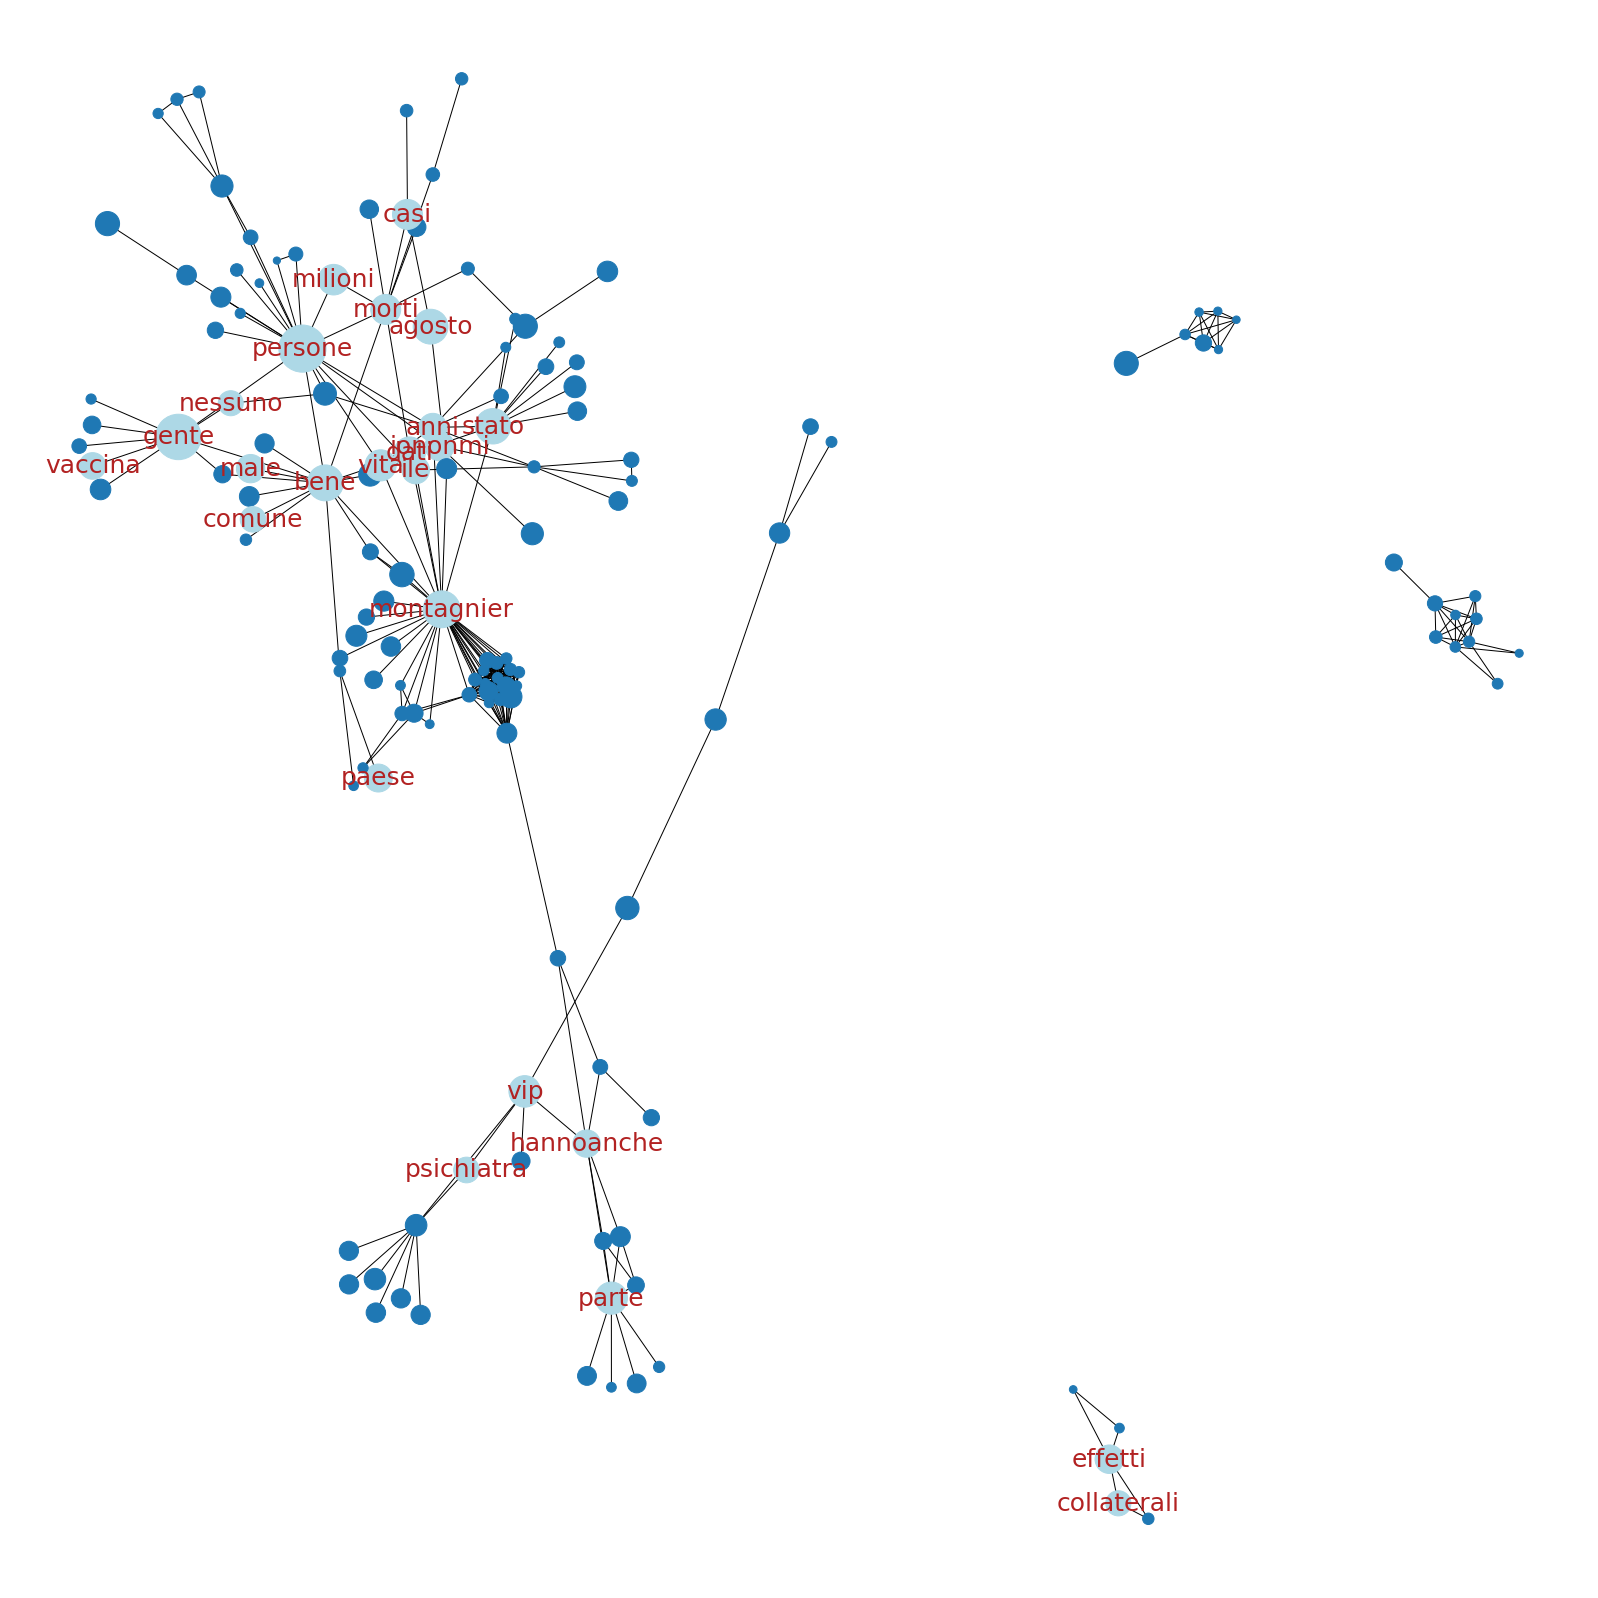

In [6]:
freq_distrib_tweet = nlp.frequency_dist(tweet_df, obj ='tweet')
graph_tweet = NetworkPlot.graph_filtered_dist(unique_tweet_df, freq_distrib_tweet, 50)
graph_tweet_filter = NetworkPlot.filter_pairwise_words(graph_tweet, 15)
NetworkPlot.keep_connected_components(graph_tweet_filter, min_degree = 5)

NetworkPlot(graph=graph_tweet_filter, frequency_dist=freq_distrib_tweet, label_thresold=600, color_thresold=600).plot()

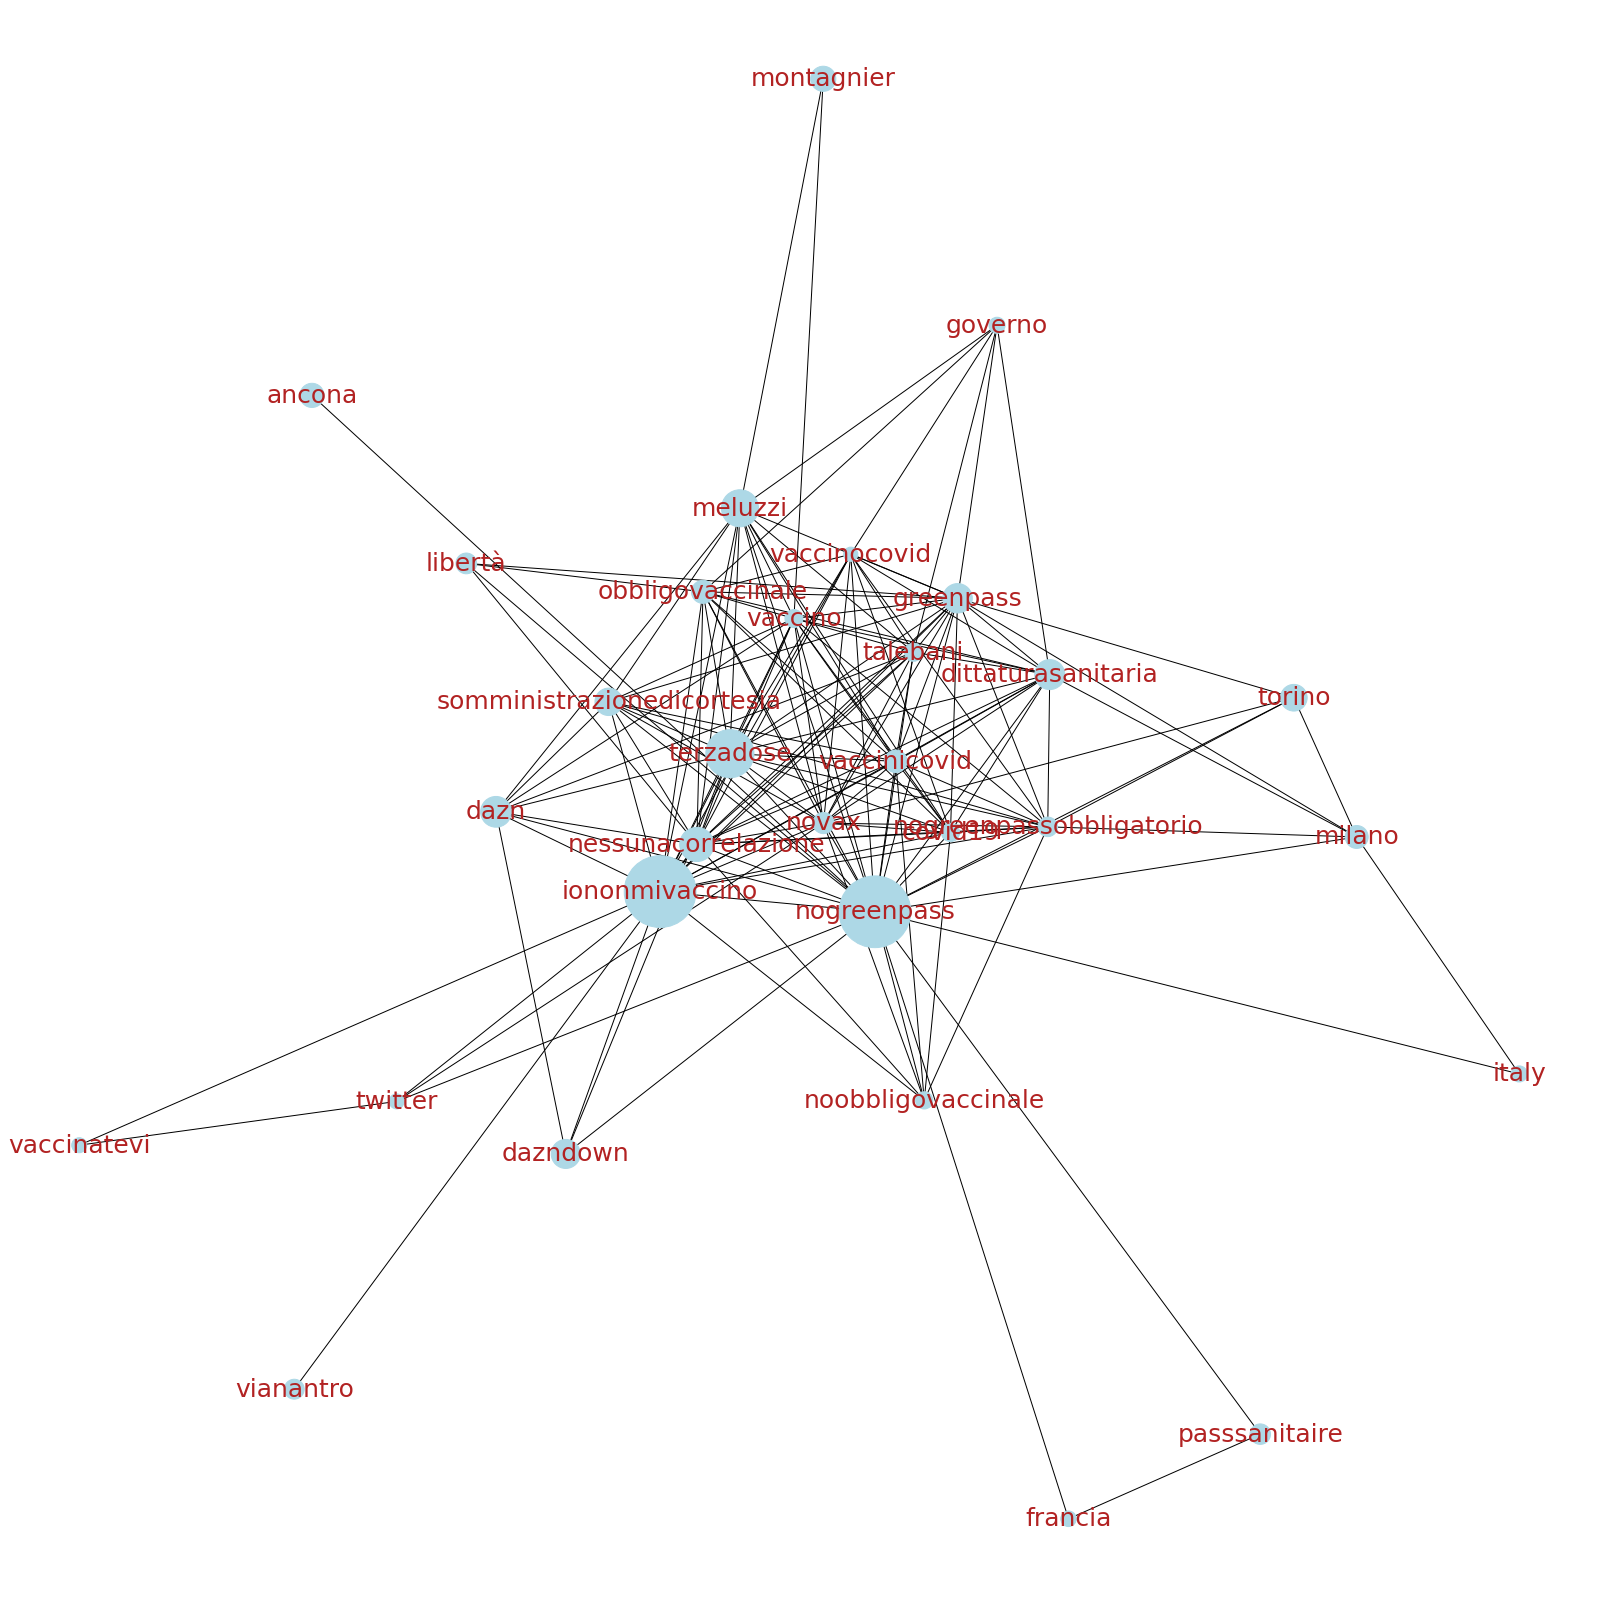

In [7]:
freq_distrib_hash = nlp.frequency_dist(tweet_df, obj ='hash')
graph_hash = NetworkPlot.graph_filtered_dist(df=unique_tweet_df, distrib=freq_distrib_hash, thresold=200, obj='hash')
NetworkPlot.keep_connected_components(graph_tweet_filter, min_degree = 5)
NetworkPlot(graph=graph_hash, frequency_dist=freq_distrib_hash, label_thresold=50, color_thresold=100).plot()

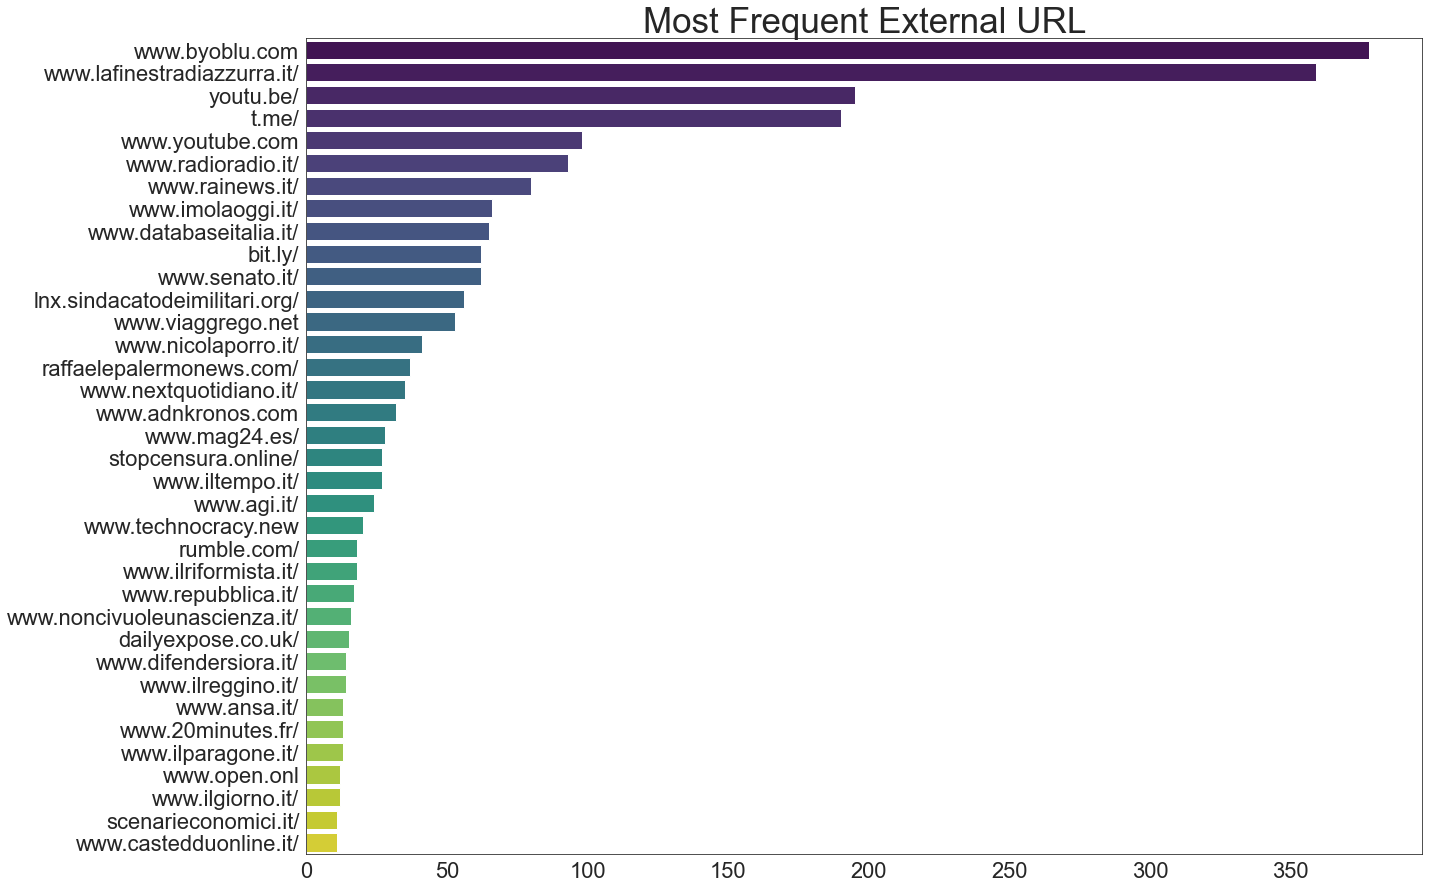

In [19]:
sns.set_style('white')
update_parameter()
count_barplot(nlp.extract_external_url(tweet_df), 10)

In [9]:
mining = TextMining()
text_to_vectorize = nlp.prepare_text_to_vectorize(unique_tweet_df, afil=True) # tweet_df
vectorized_text = mining.vectorized_text(text_to_vectorize)
print(f'Shape of the Sparse matrix: {vectorized_text.shape}')

Shape of the Sparse matrix: (7887, 24065)


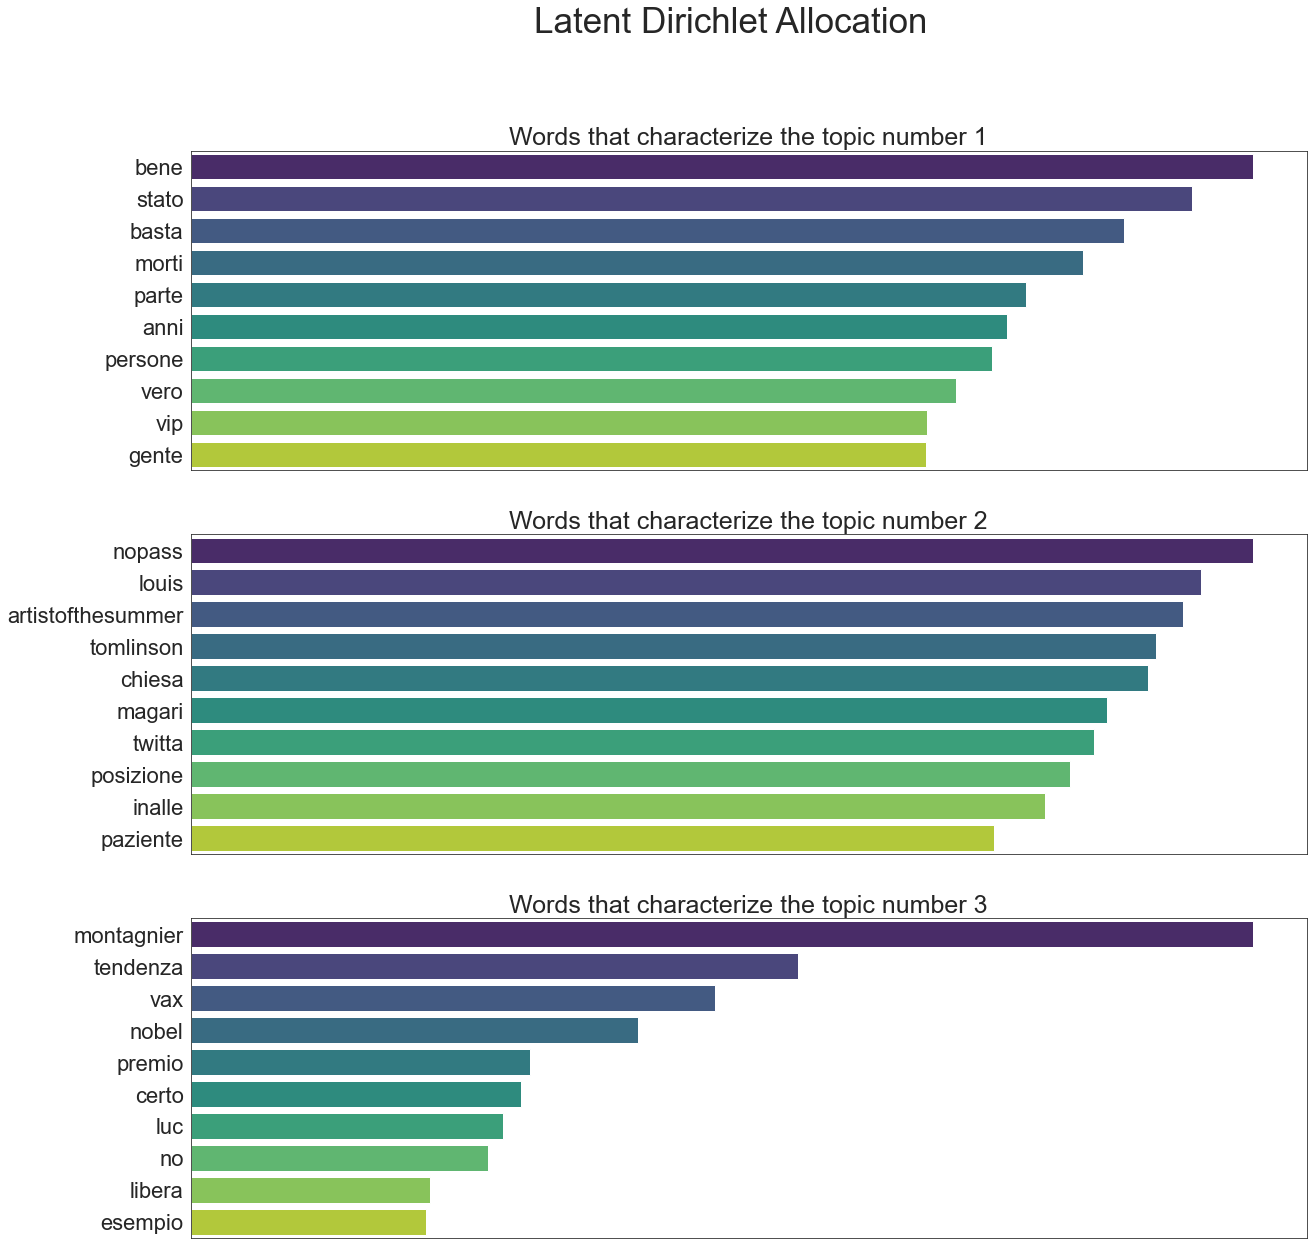

In [10]:
lda_model, feature_names = mining.lda_topic_modeling(vectorized_text, 3)
mining.plot_lda_topic(lda_model, 10)

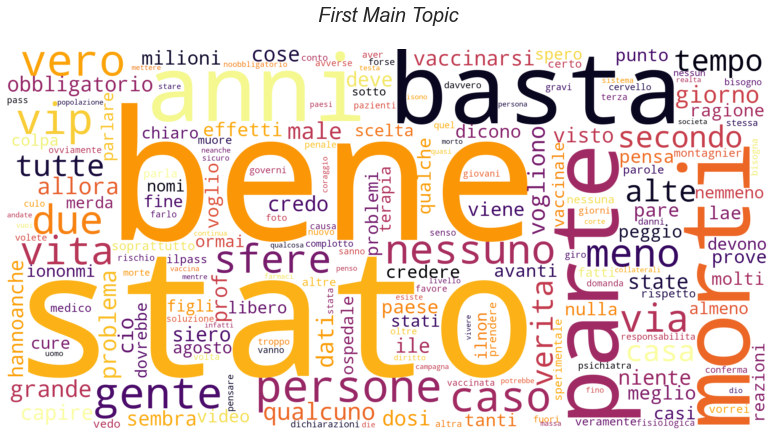

In [11]:
bag_of_words = mining.word_cloud_dict(lda_model)
mining.word_cloud_create_and_show(bag_of_words[0], 'First Main Topic')

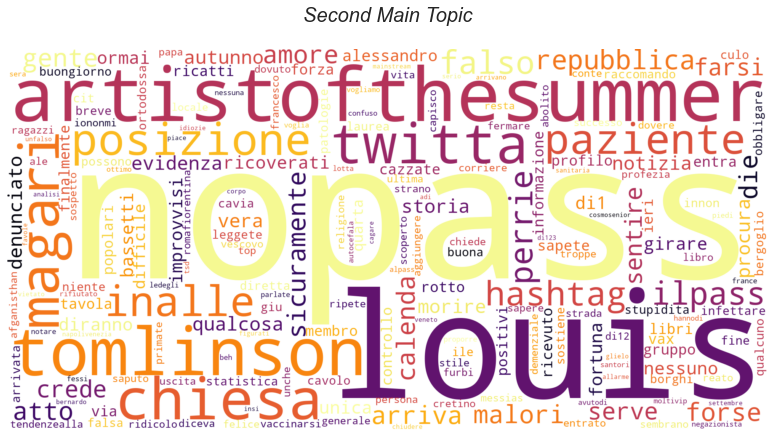

In [12]:
mining.word_cloud_create_and_show(bag_of_words[1], 'Second Main Topic')

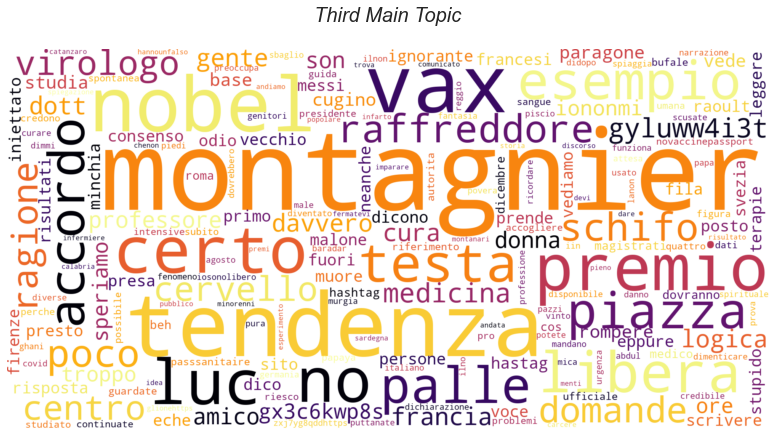

In [13]:
mining.word_cloud_create_and_show(bag_of_words[2], 'Third Main Topic')

Explained variance of the SVD step: 0.2033971216167847%


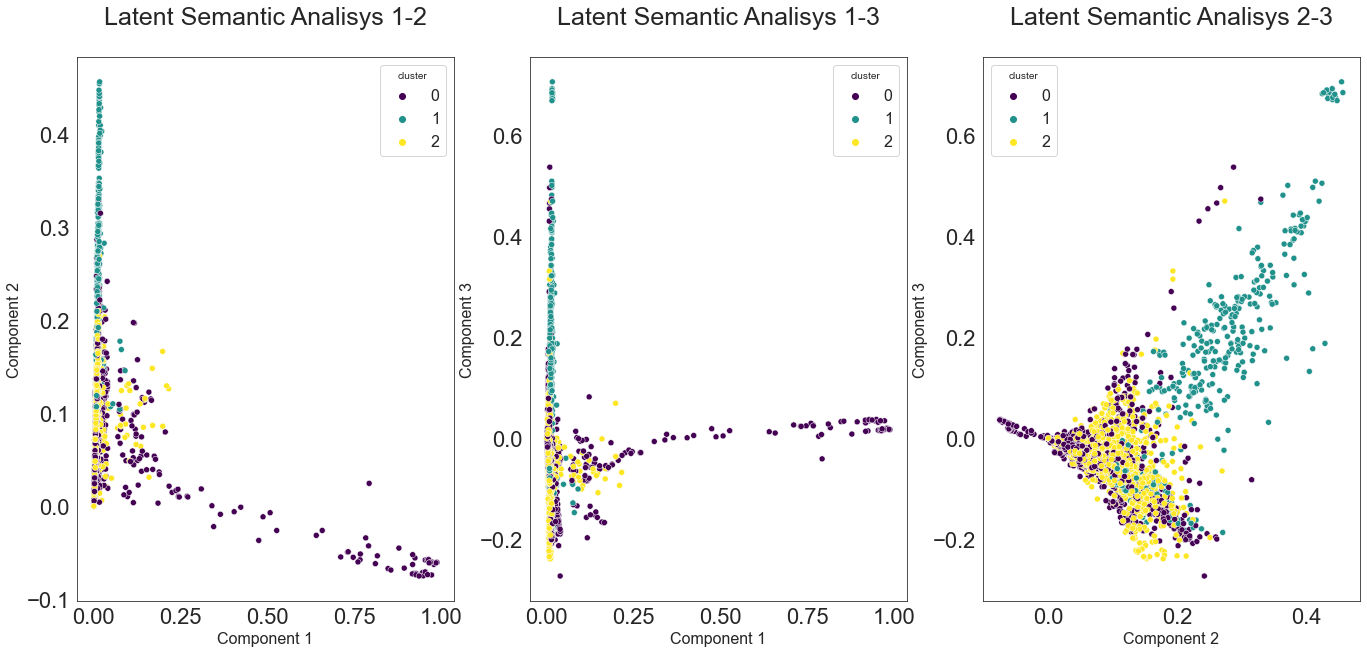

In [14]:
n_components = 300
svd_result = mining.latent_semantic_analysis(vectorized_text, n_components)
kmeans = mining.clustering_kmeans(svd_result, 3)
mining.plot_lsa(svd_result, kmeans, n_components)

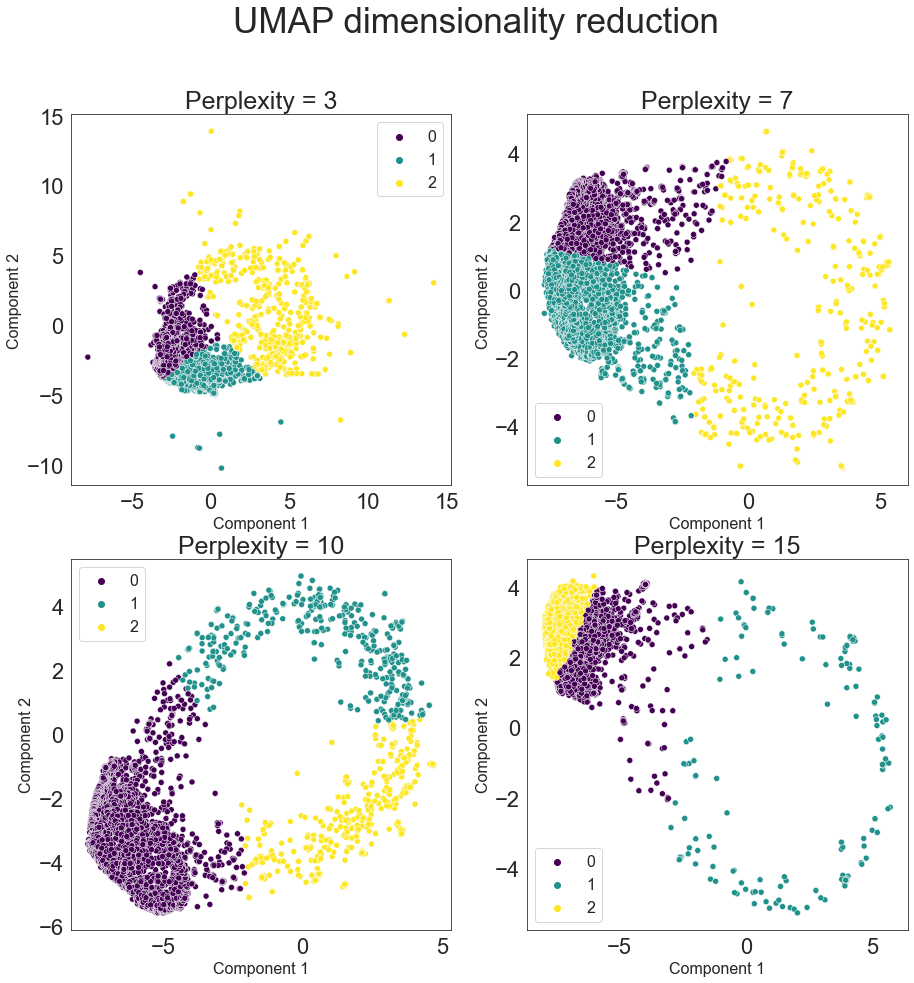

In [15]:
neighbours = [3,7,10,15]
umap_reduced = [mining.umaps(vectorized_text, k=i) for i in neighbours] #svd_result or vectorized_text?
mining.plot_umaps(umap_reduced, n_cluster=3, k=neighbours)

# HASHTAGS

mining = TextMining()
hash_to_vectorize = nlp.prepare_text_to_vectorize(unique_df, afil=True) # tweet_df
vectorized_hash = mining.vectorized_text(hash_to_vectorize)
print(f'Shape of the Sparse matrix: {vectorized_hash.shape}')

lda_model_hash, feature_names_hash = mining.lda_topic_modeling(vectorized_hash, 3)
mining.plot_lda_topic(lda_model_hash, 10)

n_components = 300
svd_result_hash = mining.latent_semantic_analysis(vectorized_hash, n_components)
kmeans = mining.clustering_kmeans(svd_result_hash, 3)
mining.plot_lsa(svd_result_hash, kmeans, n_components)

neighbours = [3,7,10,15]
umap_reduced_hash = [mining.umaps(vectorized_hash, k=i) for i in neighbours]
mining.plot_umaps(umap_reduced_hash, n_cluster=3, k=neighbours)